## **Titanic Data Analysis Based**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **The dataset I am using for the Titanic analysis is collected by Kaggle.**

**Import all required libraries**
1. Pandas --> Data Analysis
2. Matplotlib and Seaborn --> For Data Visualization

## **Information about dataset**

PassengerId  - Passengers id number

Survived - Survival (0 = No; 1 = Yes)

Class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

Name - Name

sex - Sex

Age - Age of Passengers in year 

Sibsp - Number of Siblings/Spouses Aboard

Parch - Number of Parents/Children Aboard

Fare - Passenger Fares

cabin - Cabin

Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 **Uploading the dataset**

In [ ]:
titanic = pd.read_csv("/content/drive/MyDrive/datasets/train.csv")

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Here columns are not useable As per analysis**

So, I removed these columns 
1. PassengerId
2. Name
3. Ticket

In [ ]:
titanic.drop(columns=["PassengerId","Name","Ticket"])

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


## **Our research questions**

Analysis

1. What is the overall survival rate of passengers on the titanic? 

0      0
4      0
5      0
6      0
7      0
      ..
884    0
885    0
886    0
888    0
890    0
Name: Survived, Length: 549, dtype: int64 1      1
2      1
3      1
8      1
9      1
      ..
875    1
879    1
880    1
887    1
889    1
Name: Survived, Length: 342, dtype: int64


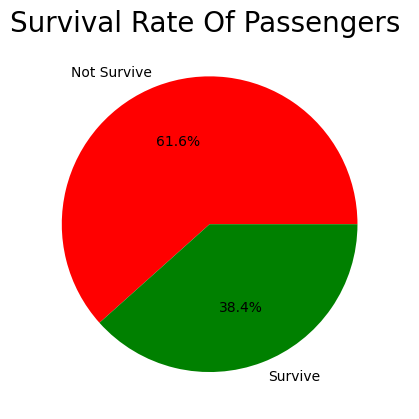

In [ ]:
 x=titanic[titanic["Survived"]==0].Survived
y=titanic[titanic["Survived"]==1].Survived
print(x,y)
plt.pie(titanic["Survived"].value_counts(),data=titanic,colors=['r','g'],labels=["Not Survive","Survive"],autopct='%1.1f%%')
plt.title("Survival Rate Of Passengers ",fontsize=20)
plt.show()

# Now, here Passengers **survival rate** is less than **not survive**.
## It is a bad thing 

In [ ]:
print(titanic.Sex.value_counts())
titanic.head()

male      577
female    314
Name: Sex, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. What was the gender distribution among the passengers on the Titanic?

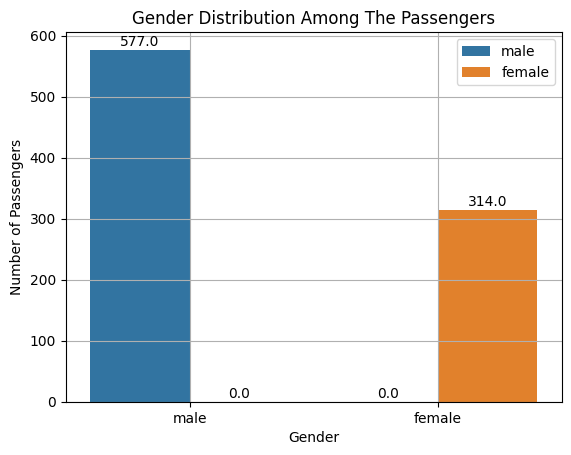

In [ ]:
chart=sns.countplot(x='Sex',hue='Sex',data=titanic)
plt.title("Gender Distribution Among The Passengers")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.legend()
for p in chart.patches:
    height=p.get_height()
    plt.annotate(f"{height}",xy=(p.get_x()+p.get_width()/2,height),xytext=(0,1),
                 textcoords="offset points",ha='center', va='bottom')
plt.grid()
plt.show()

# -->Now, here number of **male passengers** is higher than **femal passengers**
# In which number of male passengers is 577 and female passengers is **314**

3. Did the survival rate differ by gender ? if so, how much?

Sex
female    233
male      109
Name: Survived, dtype: int64


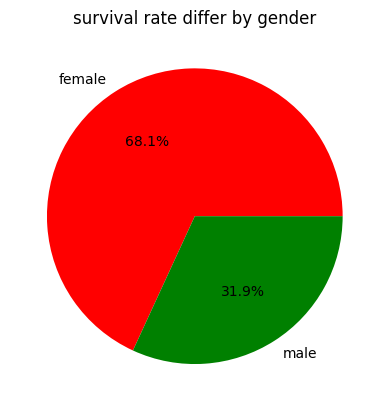

In [ ]:
survived_by_gender = titanic.groupby('Sex')['Survived'].sum()
print(survived_by_gender)
chart=plt.pie(x=survived_by_gender.values,data=titanic,colors=['r','g'],labels=survived_by_gender.index,autopct="%1.1f%%")
plt.title("survival rate differ by gender")
plt.show()

# Now, here I found number of survival rate differ by gender
# in which **68.1% female survived** and **31.9% male survived**

4. What was the age distribution among the passengers on the titanic?

In [ ]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean()).astype('int64')

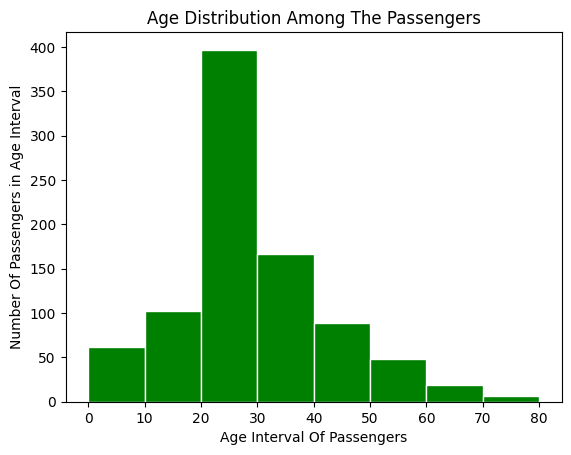

In [ ]:
plt.hist(x='Age',bins=8,data=titanic,color='g',edgecolor='w')
plt.title("Age Distribution Among The Passengers")
plt.xlabel("Age Interval Of Passengers")
plt.ylabel("Number Of Passengers in Age Interval")
plt.show()

## Now here I find most of passengers  come into (20 - 30) ages

5. Did the survival rate differ by the journey class ? if so, how much?

a. 1 means first class

b. 2 mens second class

c. 3 means third class 

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


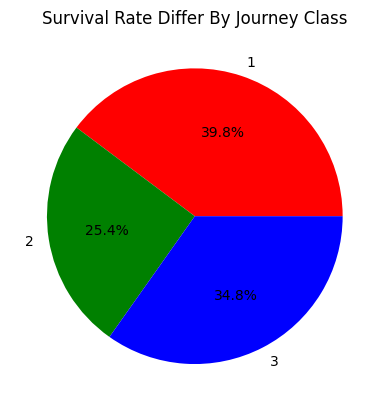

In [ ]:
survived_by_journey_class = titanic.groupby('Pclass')['Survived'].sum()
print(survived_by_journey_class)
chart=plt.pie(x=survived_by_journey_class.values,data=titanic,colors=['r','g','b'],labels=survived_by_journey_class.index,autopct="%1.1f%%")
plt.title("Survival Rate Differ By Journey Class")
plt.show()

# Now, Here I find survival rate differ by journey class,
 **1st class --> 39.8%**

 **2nd class --> 34.8%**

 **3rd class --> 25.4%**    

# **---------------Summary----------------**

#Now, Here survival rate differed by passengers **gender** and passengers **class**  where female survival rate is higher **(68.1%)** and 1st passenger class is higher **(39.8%)** .